In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
comoda = pd.read_excel('/content/drive/MyDrive/comoda/LDOS-CoMoDa.xls')

In [4]:
comoda

,userID,itemID,rating,age,sex,city,country,time,daytype,season,location,weather,social,endEmo,dominantEmo,mood,physical,decision,interaction,director,movieCountry,movieLanguage,movieYear,genre1,genre2,genre3,actor1,actor2,actor3,budget
0,23,14,5,33,1,20,2,3,2,2,1,1,1,2,2,2,1,1,1,234,36,9,2007,7,-1,-1,1303,1524,1656,9000000
1,21,5,3,28,1,10,3,2,2,2,1,1,2,2,2,2,2,2,2,775,37,9,1998,7,6,10,1636,1539,1402,90000000
2,21,6,4,28,1,10,3,4,2,2,1,1,2,2,2,1,1,2,1,33,37,9,2008,7,10,18,1373,1510,1691,24000000
3,22,13,4,28,1,20,2,3,2,3,2,2,3,2,3,1,1,1,1,590,37,9,2010,1,14,19,1382,57,1109,60000000
4,21,7,3,28,1,10,3,4,2,2,1,1,2,1,7,1,1,2,1,488,37,9,2003,3,10,18,98,385,1827,35000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,31,4324,4,30,2,20,2,2,2,2,1,1,1,2,7,1,1,1,1,283,36,9,2011,1,3,8,1623,1008,1458,125000000
2292,61,177,5,28,1,20,2,4,3,2,3,1,2,2,2,1,1,1,2,796,37,9,1979,1,3,21,1340,826,467,-1
2293,125,177,5,23,2,3,5,4,3,2,1,1,2,2,2,1,1,2,1,796,37,9,1979,1,3,21,1340,826,467,-1
2294,21,4288,2,28,1,10,3,2,2,2,2,1,1,2,7,1,1,1,1,244,37,9,2012,1,10,19,895,1002,1179,78000000


In [5]:
length = len(comoda)
print(length)
train = comoda[0:8*length//10]
test = comoda[8*length//10:]

2296


In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

**Train with All User Data**

In [7]:
def alluserdata(comoda):
  train = comoda[0:8*length//10]
  test = comoda[8*length//10:]
  cols = train.columns
  cols = list(cols)
  cols.remove("rating")
  X, y = train[cols], train['rating']
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, y)
  X_test, y_test = test[cols], test['rating']
  preds = clf.predict(X_test)
  error_tree=mean_squared_error(y_test, preds)
  err_tree_mae=mean_absolute_error(y_test, preds)

  rfr = RandomForestRegressor(n_estimators=200, bootstrap=True, criterion='absolute_error', min_samples_leaf=5, random_state=0)
  rfr.fit(X,y)
  preds2 = rfr.predict(X_test)
  error_rfr = mean_squared_error(y_test, preds2)
  err_rfr_mae=mean_absolute_error(y_test, preds2)
  return error_tree,err_tree_mae,error_rfr,err_rfr_mae

In [8]:
err_tree,err_mae,err_rfr,err_rfr_mae=alluserdata(comoda)
print("Mean Squared Error for Decision Tree: ",err_tree)
print("Mean Absolute Error for Decision Tree: ",err_mae)
print("Mean Squared Error for Random Forest Regressor: ",err_rfr)
print("Mean Absolute Error for Random Forest Regressor: ",err_rfr_mae)

Mean Squared Error for Decision Tree:  1.7565217391304349
Mean Absolute Error for Decision Tree:  0.9260869565217391
Mean Squared Error for Random Forest Regressor:  0.8856051494565217
Mean Absolute Error for Random Forest Regressor:  0.7232554347826087


**Train with No User Data**

In [9]:
def nouserdata(comoda):
  comoda2 = comoda[['userID','itemID','age','sex','city','country','director','movieCountry','movieLanguage','movieYear','genre1','genre2','genre3','actor1','actor2','actor3','budget','rating']]
  train = comoda2[0:8*length//10]
  test = comoda2[8*length//10:]
  cols = train.columns
  cols = list(cols)
  cols.remove("rating")
  X, y = train[cols], train['rating']
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, y)
  X_test, y_test = test[cols], test['rating']
  preds = clf.predict(X_test)
  error_tree=mean_squared_error(y_test, preds)
  err_tree_mae=mean_absolute_error(y_test, preds)

  rfr = RandomForestRegressor(n_estimators=200, bootstrap=True, criterion='absolute_error', min_samples_leaf=5, random_state=0)
  rfr.fit(X,y)
  preds2 = rfr.predict(X_test)
  error_rfr = mean_squared_error(y_test, preds2)
  err_rfr_mae=mean_absolute_error(y_test, preds2)
  return error_tree,err_tree_mae,error_rfr,err_rfr_mae

In [10]:
err_tree,err_mae,err_rfr,err_rfr_mae=nouserdata(comoda)
print("Mean Squared Error for Decision Tree: ",err_tree)
print("Mean Absolute Error for Decision Tree: ",err_mae)
print("Mean Squared Error for Random Forest Regressor: ",err_rfr)
print("Mean Absolute Error for Random Forest Regressor: ",err_rfr_mae)

Mean Squared Error for Decision Tree:  2.517391304347826
Mean Absolute Error for Decision Tree:  1.191304347826087
Mean Squared Error for Random Forest Regressor:  1.1968989402173913
Mean Absolute Error for Random Forest Regressor:  0.8983152173913043


**Train with Inportant Contextual Data**

In [ ]:
def impuserdata(comoda):
  comoda2 = comoda[['userID','itemID','age','sex','city','country','endEmo','dominantEmo','mood','physical','decision','interaction','director','movieCountry','movieLanguage','movieYear','genre1','genre2','genre3','actor1','actor2','actor3','budget','rating']]
  train = comoda2[0:8*length//10]
  test = comoda2[8*length//10:]
  cols = train.columns
  cols = list(cols)
  cols.remove("rating")
  X, y = train[cols], train['rating']
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, y)
  X_test, y_test = test[cols], test['rating']
  preds = clf.predict(X_test)
  error_tree=mean_squared_error(y_test, preds)
  err_tree_mae=mean_absolute_error(y_test, preds)
  
  rfr = RandomForestRegressor(n_estimators=200, bootstrap=True, criterion='absolute_error', min_samples_leaf=5, random_state=0)
  rfr.fit(X,y)
  preds2 = rfr.predict(X_test)
  error_rfr = mean_squared_error(y_test, preds2)
  err_rfr_mae=mean_absolute_error(y_test, preds2)
  return error_tree,err_tree_mae,error_rfr,err_rfr_mae

In [ ]:
err_tree,err_mae,err_rfr,err_rfr_mae=impuserdata(comoda)
print("Mean Squared Error for Decision Tree: ",err_tree)
print("Mean Absolute Error for Decision Tree: ",err_mae)
print("Mean Squared Error for Random Forest Regressor: ",err_rfr)
print("Mean Absolute Error for Random Forest Regressor: ",err_rfr_mae)

Mean Squared Error for Decision Tree:  1.5195652173913043
Mean Absolute Error for Decision Tree:  0.8282608695652174
Mean Squared Error for Random Forest Regressor:  0.8884560054347826
Mean Absolute Error for Random Forest Regressor:  0.724358695652174


**Train with Important and Inconclusive Data**

In [ ]:
def impinconuserdata(comoda):
  comoda2 = comoda[['userID','itemID','age','sex','city','country','daytype','location','endEmo','dominantEmo','mood','physical','decision','interaction','director','movieCountry','movieLanguage','movieYear','genre1','genre2','genre3','actor1','actor2','actor3','budget','rating']]
  train = comoda2[0:8*length//10]
  test = comoda2[8*length//10:]
  cols = train.columns
  cols = list(cols)
  cols.remove("rating")
  X, y = train[cols], train['rating']
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, y)
  X_test, y_test = test[cols], test['rating']
  preds = clf.predict(X_test)
  error_tree=mean_squared_error(y_test, preds)
  err_tree_mae=mean_absolute_error(y_test, preds)

  rfr = RandomForestRegressor(n_estimators=200, bootstrap=True, criterion='absolute_error', min_samples_leaf=5, random_state=0)
  rfr.fit(X,y)
  preds2 = rfr.predict(X_test)
  error_rfr = mean_squared_error(y_test, preds2)
  err_rfr_mae=mean_absolute_error(y_test, preds2)
  return error_tree,err_tree_mae,error_rfr,err_rfr_mae

In [ ]:
err_tree,err_mae,err_rfr,err_rfr_mae=impinconuserdata(comoda)
print("Mean Squared Error for Decision Tree: ",err_tree)
print("Mean Absolute Error for Decision Tree: ",err_mae)
print("Mean Squared Error for Random Forest Regressor: ",err_rfr)
print("Mean Absolute Error for Random Forest Regressor: ",err_rfr_mae)

Mean Squared Error for Decision Tree:  1.6152173913043477
Mean Absolute Error for Decision Tree:  0.8717391304347826
Mean Squared Error for Random Forest Regressor:  0.8723046195652174
Mean Absolute Error for Random Forest Regressor:  0.7195326086956522


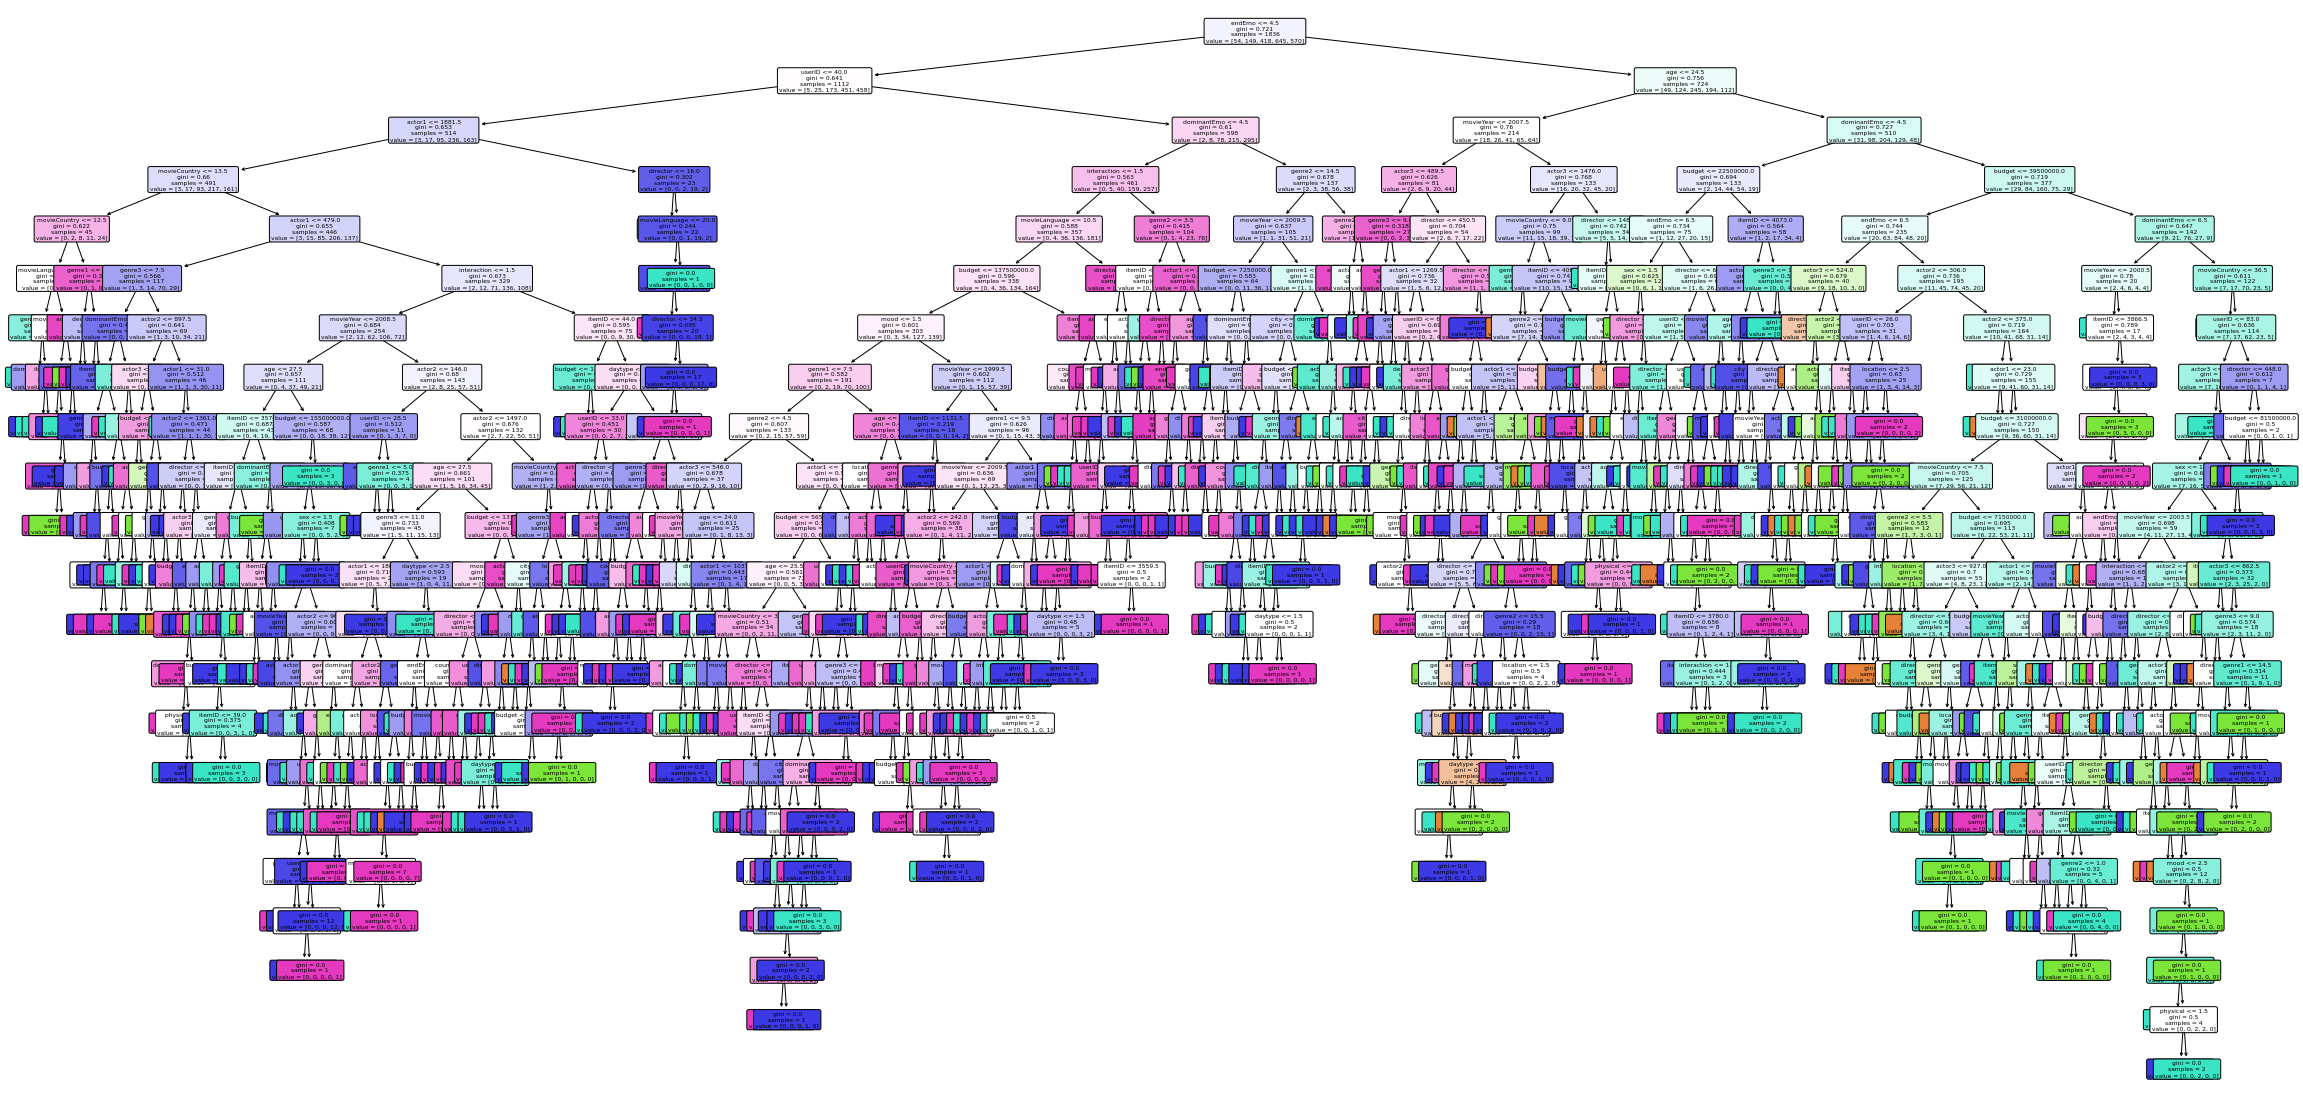

In [ ]:
comoda2 = comoda[['userID','itemID','age','sex','city','country','daytype','location','endEmo','dominantEmo','mood','physical','decision','interaction','director','movieCountry','movieLanguage','movieYear','genre1','genre2','genre3','actor1','actor2','actor3','budget','rating']]
train = comoda2[0:8*length//10]
test = comoda2[8*length//10:]
cols = train.columns
cols = list(cols)
cols.remove("rating")
X, y = train[cols], train['rating']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(clf, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.savefig('UserData.png', dpi=800)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
train = comoda[0:8*length//10]
test = comoda[8*length//10:]
cols = train.columns
cols = list(cols)
cols.remove("rating")
X, y = train[cols], train['rating']
X_test, y_test = test[cols], test['rating']
